<a href="https://colab.research.google.com/github/Rakhshindaa/Internship_tasks/blob/main/Sentiment_Analysis_on_twitter_data_for_US_election_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nltk
!pip install wordcloud
!pip install textblob

In [ ]:
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# Libraries for Sentiment Analysis
import re
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
from wordcloud import WordCloud

# avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
trump = pd.read_csv("donaldtrump.csv", lineterminator='\n')
print(trump.head(3))

            created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:01  1.316529e+18   
2  2020-10-15 00:00:02  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...   26.0            9.0   
2  #Trump: As a student I used to hear for years,...    2.0            1.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   
2   Twitter Web App    8436472.0              snarke           snarke   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgcom24: tutte le notizie...  ...   
2  Will mock for food! Freelance writer, blogger,.

In [ ]:
# Display all the columns in the DataFrame
print(trump.columns)

Index(['created_at', 'tweet_id', 'tweet', 'likes', 'retweet_count', 'source',
       'user_id', 'user_name', 'user_screen_name', 'user_description',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'continent', 'state', 'state_code',
       'collected_at'],
      dtype='object')


In [ ]:
biden = pd.read_csv("joebiden.csv", quoting=3, lineterminator='\n', on_bad_lines='skip')
print(biden.head(1))

            created_at               tweet_id  \
0  2020-10-15 00:00:01  1.316529221557252e+18   

                                               tweet likes retweet_count  \
0  "#Elecciones2020 | En #Florida: #JoeBiden dice...   NaN           NaN   

  source user_id user_name user_screen_name user_description  ...  \
0    NaN     NaN       NaN              NaN              NaN  ...   

  user_followers_count user_location  lat long city country continent state  \
0                  NaN           NaN  NaN  NaN  NaN     NaN       NaN   NaN   

  state_code collected_at  
0        NaN          NaN  

[1 rows x 21 columns]


In [ ]:
print(trump.shape)
print(biden.shape)

(9965, 21)
(19741, 21)


In [ ]:
# Getting trump dataset information
trump.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9965 entries, 0 to 9964
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   created_at            9965 non-null   object 
 1   tweet_id              9965 non-null   float64
 2   tweet                 9965 non-null   object 
 3   likes                 9965 non-null   float64
 4   retweet_count         9965 non-null   float64
 5   source                9931 non-null   object 
 6   user_id               9965 non-null   float64
 7   user_name             9963 non-null   object 
 8   user_screen_name      9965 non-null   object 
 9   user_description      8899 non-null   object 
 10  user_join_date        9964 non-null   object 
 11  user_followers_count  9964 non-null   float64
 12  user_location         6908 non-null   object 
 13  lat                   5211 non-null   float64
 14  long                  5211 non-null   float64
 15  city                 

In [ ]:
# Getting biden dataset information
biden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19741 entries, 0 to 19740
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   created_at            19738 non-null  object
 1   tweet_id              12616 non-null  object
 2   tweet                 12148 non-null  object
 3   likes                 8365 non-null   object
 4   retweet_count         7395 non-null   object
 5   source                7119 non-null   object
 6   user_id               6813 non-null   object
 7   user_name             6323 non-null   object
 8   user_screen_name      6125 non-null   object
 9   user_description      5208 non-null   object
 10  user_join_date        4643 non-null   object
 11  user_followers_count  4944 non-null   object
 12  user_location         2621 non-null   object
 13  lat                   1482 non-null   object
 14  long                  1351 non-null   object
 15  city                  1103 non-null 

In [ ]:
# creating a new column 'candidate' to differentiate between tweets of Trump and Biden
trump['candidate'] = 'trump'
biden['candidate'] = 'biden'

# combining the dataframes
data = pd.concat([trump, biden])

# FInal data shape
print('Final Data Shape :', data.shape)

# View the first 2 rows
print("\nFirst 2 rows:")
print(data.head(3))

Final Data Shape : (29706, 22)

First 2 rows:
            created_at               tweet_id  \
0  2020-10-15 00:00:01  1316529221557252096.0   
1  2020-10-15 00:00:01  1316529222748430336.0   
2  2020-10-15 00:00:02  1316529228091846912.0   

                                               tweet likes retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...   0.0           0.0   
1  Usa 2020, Trump contro Facebook e Twitter: cop...  26.0           9.0   
2  #Trump: As a student I used to hear for years,...   2.0           1.0   

             source      user_id           user_name user_screen_name  \
0         TweetDeck  360666534.0  El Sol Latino News  elsollatinonews   
1  Social Mediaset   331617619.0             Tgcom24  MediasetTgcom24   
2   Twitter Web App    8436472.0              snarke           snarke   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Profilo ufficiale di Tgcom24: tutt

In [ ]:
# dropping null values if they exist
data.dropna(inplace=True)

In [ ]:
data['country'].value_counts()

,count
country,
United States of America,1546
United Kingdom,164
France,157
Canada,108
Australia,93
India,90
Germany,86
The Netherlands,76
Brazil,44


In [ ]:
data['country'] = data['country'].replace({'United States of America': "US",'United States': "US"})

In [ ]:
print(data.groupby('candidate')['tweet'].count())

candidate
biden     194
trump    2303
Name: tweet, dtype: int64


In [ ]:
# Group the data by 'candidate'
tweets_count = data.groupby('candidate')['tweet'].count().reset_index()
print(data.groupby('candidate')['tweet'].count())
fig = px.bar(tweets_count, x='candidate', y='tweet', color='candidate',
             color_discrete_map={'Trump': 'pink', 'Biden': 'blue'},
             labels={'candidate': 'Candidates', 'tweet': 'Number of Tweets'},
             title='Tweets for Candidates')
fig.show()

candidate
biden     194
trump    2303
Name: tweet, dtype: int64


In [ ]:
top10countries = data.groupby('country')['tweet'].count().sort_values(ascending=False).reset_index().head(10)
fig = px.bar(top10countries, x='country', y='tweet',title='Top10 Countrywise tweets Counts')
fig.show()


In [ ]:
tweet_df = data.groupby(['country', 'candidate'])['tweet'].count().reset_index()
tweeters = tweet_df[tweet_df['country'].isin(top10countries.country)]
fig = px.bar(tweeters, x='country', y='tweet', color='candidate',
             labels={'country': 'Country', 'tweet': 'Number of Tweets','candidate': 'Candidate'},
             title='Tweet Counts for Each Candidate in the Top 10 Countries',
             barmode='stack')
fig.show()

In [ ]:
def clean(text):
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', str(text))
    # Convert text to lowercase
    text = text.lower()
    # Replace anything other than alphabets a-z with a space
    text = re.sub('[^a-z]', ' ', text)
    # Split the text into single words
    text = text.split()
    # Initialize WordNetLemmatizer
    lm = WordNetLemmatizer()
    # Lemmatize words and remove stopwords
    text = [lm.lemmatize(word) for word in text if word not in set(stopwords.words('english'))]
    # Join the words back into a sentence
    text = ' '.join(word for word in text)
    return text

In [ ]:
def getpolarity(text):
    return TextBlob(text).sentiment.polarity
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getAnalysis(score):
    if score < 0:
        return 'negative'
    elif score == 0:
        return 'neutral'
    else:
        return 'positive'

In [ ]:
trump_tweets = data[data['candidate'] == 'trump']
# taking only U.S. country data
trump_tweets = trump_tweets.loc[trump_tweets.country == 'US']
trump_tweets = trump_tweets[['tweet']]
print(trump_tweets.head())

                                                tweet
2   #Trump: As a student I used to hear for years,...
4   You get a tie! And you get a tie! #Trump ‘s ra...
11  In 2020, #NYPost is being #censorship #CENSORE...
12  #Trump #PresidentTrump #Trump2020LandslideVict...
22  #Trump: Nobody likes to tell you this, but som...


In [ ]:
trump_tweets['cleantext'] = trump_tweets['tweet'].apply(clean)
print(trump_tweets.head())

                                                tweet  \
2   #Trump: As a student I used to hear for years,...   
4   You get a tie! And you get a tie! #Trump ‘s ra...   
11  In 2020, #NYPost is being #censorship #CENSORE...   
12  #Trump #PresidentTrump #Trump2020LandslideVict...   
22  #Trump: Nobody likes to tell you this, but som...   

                                            cleantext  
2   trump student used hear year ten year heard ch...  
4                    get tie get tie trump rally iowa  
11  nypost censorship censored twitter manipulate ...  
12  trump presidenttrump trump landslidevictory tr...  
22  trump nobody like tell farmer better way worki...  


In [ ]:
trump_tweets['subjectivity'] = trump_tweets['cleantext'].apply(getsubjectivity)

In [ ]:
trump_tweets['polarity'] = trump_tweets['cleantext'].apply(getpolarity)

In [ ]:
trump_tweets['analysis'] = trump_tweets['polarity'].apply(getAnalysis)
trump_tweets.head()

,tweet,cleantext,subjectivity,polarity,analysis
2,"#Trump: As a student I used to hear for years,...",trump student used hear year ten year heard ch...,0.333333,0.333333,positive
4,You get a tie! And you get a tie! #Trump ‘s ra...,get tie get tie trump rally iowa,0.000000,0.000000,neutral
11,"In 2020, #NYPost is being #censorship #CENSORE...",nypost censorship censored twitter manipulate ...,0.678571,-0.148810,negative
12,#Trump #PresidentTrump #Trump2020LandslideVict...,trump presidenttrump trump landslidevictory tr...,0.750000,0.500000,positive
22,"#Trump: Nobody likes to tell you this, but som...",trump nobody like tell farmer better way worki...,0.595238,0.261905,positive


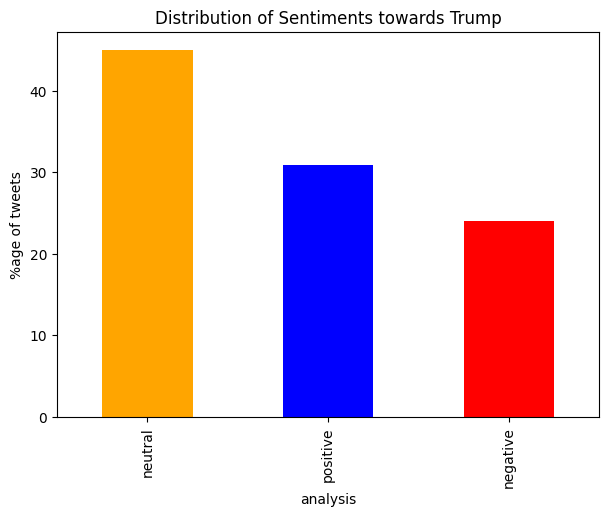

In [ ]:
colors = ['orange', 'blue', 'red']
plt.figure(figsize=(7, 5))
(trump_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors)
plt.ylabel("%age of tweets")
plt.title("Distribution of Sentiments towards Trump")
plt.show()

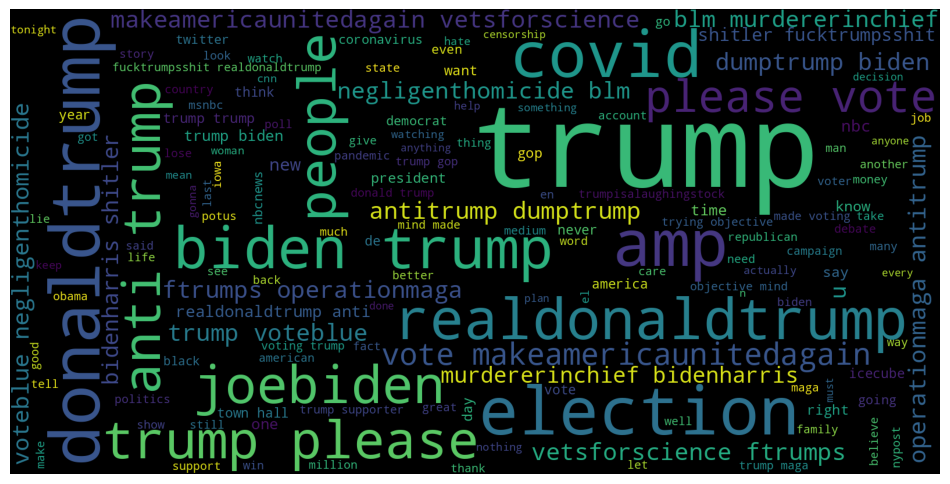

In [ ]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join(wd_list)
    wordcloud = WordCloud(background_color='black', stopwords=stopwords,
                        width=1600, height=800, max_words=150, max_font_size=200,
                        colormap="viridis").generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud)
word_cloud(trump_tweets['cleantext'][:5000])

In [ ]:
biden_tweets = data[data['candidate'] == 'biden']
biden_tweets = biden_tweets.loc[biden_tweets.country == 'US']
biden_tweets = biden_tweets[['tweet']]
biden_tweets

,tweet
62,1.0
158,0.0
515,382.0
570,0.0
573,watching the legacy media and big tech work in...
...,...
18741,Biden and Trump Will Have Dueling Town Halls h...
19084,0.0
19138,5.0
19495,#censorship #Biden #Obama #KamalaHarris https:...


In [ ]:
biden_tweets['cleantext']=biden_tweets['tweet'].apply(clean)
biden_tweets.head()

,tweet,cleantext
62,1.0,
158,0.0,
515,382.0,
570,0.0,
573,watching the legacy media and big tech work in...,watching legacy medium big tech work concert p...


In [ ]:
biden_tweets['subjectivity'] = biden_tweets['cleantext'].apply(getsubjectivity)
biden_tweets['polarity'] = biden_tweets['cleantext'].apply(getpolarity)
biden_tweets['analysis'] = biden_tweets['polarity'].apply(getAnalysis)
biden_tweets.head()

,tweet,cleantext,subjectivity,polarity,analysis
62,1.0,,0.000,0.0,neutral
158,0.0,,0.000,0.0,neutral
515,382.0,,0.000,0.0,neutral
570,0.0,,0.000,0.0,neutral
573,watching the legacy media and big tech work in...,watching legacy medium big tech work concert p...,0.075,0.0,neutral


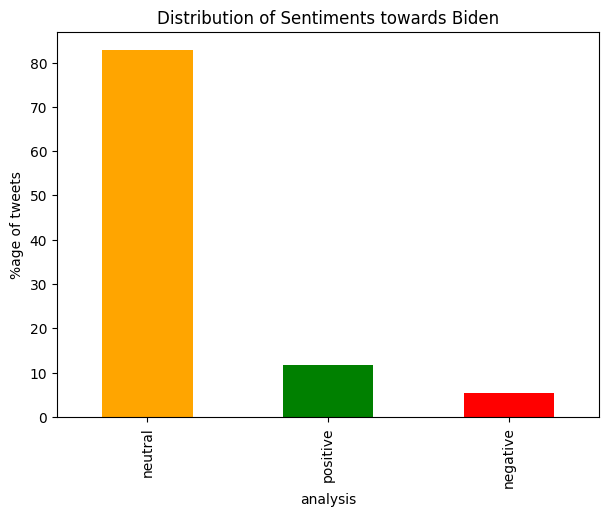

In [ ]:
colors = ['orange', 'green', 'red']
plt.figure(figsize=(7, 5))
(biden_tweets.analysis.value_counts(normalize=True) * 100).plot.bar(color=colors)
plt.ylabel("%age of tweets")
plt.title("Distribution of Sentiments towards Biden")
plt.show()

In [ ]:
trump_tweets.analysis.value_counts(normalize=True)*100

,proportion
analysis,
neutral,44.992948
positive,30.959097
negative,24.047955


In [ ]:
biden_tweets.analysis.value_counts(normalize=True)*100

,proportion
analysis,
neutral,82.81250
positive,11.71875
negative,5.46875


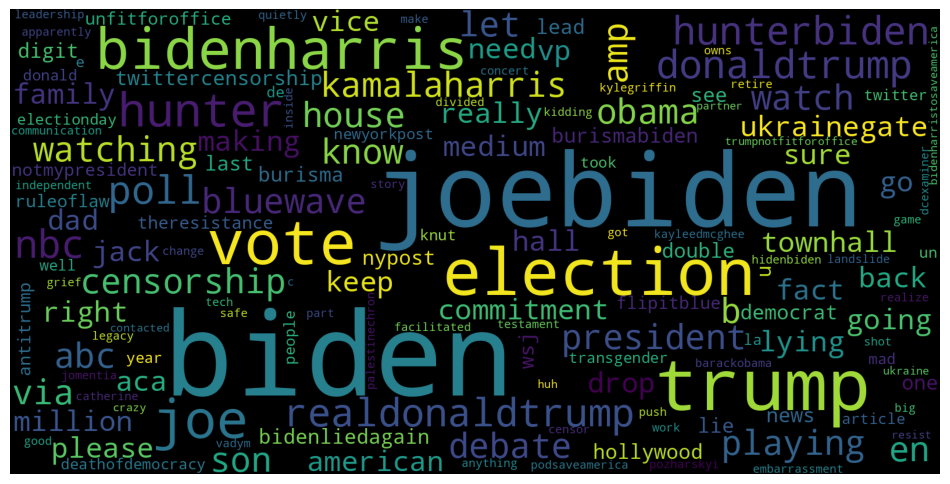

In [ ]:
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
def word_cloud(wd_list):
    stopwords = set(STOPWORDS)
    all_words = ' '.join(wd_list)
    wordcloud = WordCloud(background_color='black', stopwords=stopwords,
                        width=1600, height=800, max_words=150, max_font_size=200,
                        colormap="viridis").generate(all_words)
    plt.figure(figsize=(12, 10))
    plt.axis('off')
    plt.imshow(wordcloud)
word_cloud(biden_tweets['cleantext'][:5000])

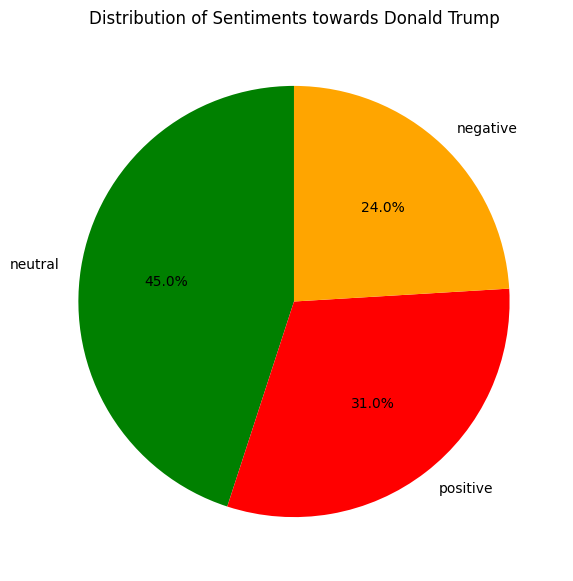

In [ ]:
import matplotlib.pyplot as plt
sentiment_counts = trump_tweets.analysis.value_counts(normalize=True) * 100
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'orange'])
plt.title("Distribution of Sentiments towards Donald Trump")
plt.show()

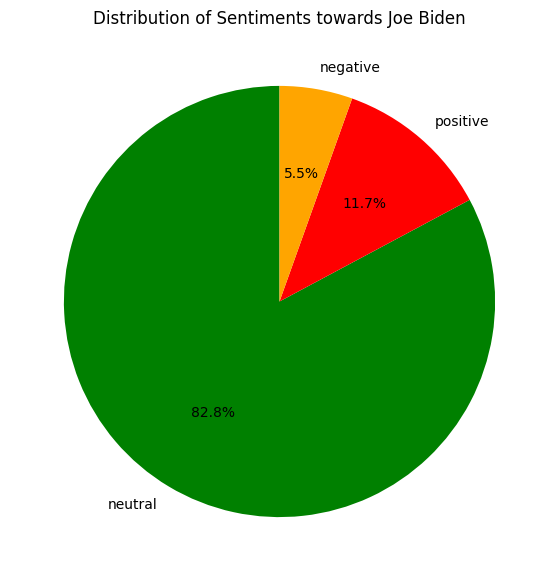

In [ ]:
sentiment_counts = biden_tweets.analysis.value_counts(normalize=True) * 100
plt.figure(figsize=(7, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red', 'orange'])
plt.title("Distribution of Sentiments towards Joe Biden")
plt.show()